In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
df = pd.read_csv('../data/mag/realdata_mf50_rent.csv')

In [3]:
df.columns

Index(['geoid', 'overall_19', 'studio_19', 'one_19', 'two_19', 'three_19',
       'four_19', 'overall_22', 'studio_22', 'one_22', 'two_22', 'three_22',
       'four_22', 'overall_1922', 'studio_1922', 'one_1922', 'two_1922',
       'three_1922', 'four_1922', 'overall_1922p', 'studio_1922p', 'one_1922p',
       'two_1922p', 'three_1922p', 'four_1922p'],
      dtype='object')

## Map prices

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

In [6]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
geo.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475..."
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874..."


lightrail = gpd.read_file('../data/geo/shapefiles/light_rail.geojson')
lightrail = lightrail.to_crs(4269)

### join data to geo files

In [7]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='geoid')

In [8]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,overall_19,studio_19,one_19,two_19,three_19,four_19,overall_22,studio_22,one_22,two_22,three_22,four_22,overall_1922,studio_1922,one_1922,two_1922,three_1922,four_1922,overall_1922p,studio_1922p,one_1922p,two_1922p,three_1922p,four_1922p
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,1208,877.0,1130,1307,1548,1220.0,1807,1546.0,1599,1932,2407,1450.0,417.80,537.45,299.5,428.95,626.8,47.0,0.300749,0.532894,0.230473,0.285386,0.352095,0.0335
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,1599,1413.0,1480,1774,2204,NaN,2124,1669.0,1905,2358,3068,NaN,285.15,44.05,203.0,317.90,533.4,0.0,0.155070,0.027109,0.119271,0.155826,0.210447,NaN


In [9]:
df.describe()

,ALAND20,AWATER20,joinid,geoid,overall_19,studio_19,one_19,two_19,three_19,four_19,overall_22,studio_22,one_22,two_22,three_22,four_22,overall_1922,studio_1922,one_1922,two_1922,three_1922,four_1922,overall_1922p,studio_1922p,one_1922p,two_1922p,three_1922p,four_1922p
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,7.000000,15.000000,15.000000,15.000000,15.000000,15.000000,7.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,7.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,1032.133333,782.866667,946.800000,1122.200000,1430.000000,1265.714286,1443.400000,1119.533333,1333.400000,1583.400000,2026.200000,1954.142857,256.446667,219.236667,244.580000,292.870000,381.700000,232.666667,0.220246,0.270526,0.233248,0.235230,0.249191,0.372762
std,1.990223e+08,9.764382e+05,5.235411,5.235411,212.591448,216.856393,197.239231,240.964194,312.739508,222.855494,274.533839,231.724857,230.373548,291.820101,397.245372,351.853392,79.406170,118.818422,72.006252,85.625872,211.406546,362.745453,0.068834,0.174573,0.086640,0.085153,0.189825,0.333372
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,798.000000,450.000000,725.000000,854.000000,948.000000,1003.000000,1128.000000,748.000000,994.000000,1150.000000,1400.000000,1450.000000,161.400000,44.050000,114.250000,126.500000,94.700000,0.000000,0.117525,0.027109,0.119271,0.123596,0.052719,0.033500
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,892.500000,685.000000,807.500000,946.500000,1227.500000,1109.500000,1223.000000,1015.000000,1172.500000,1402.000000,1795.500000,1700.000000,208.250000,157.550000,203.525000,253.500000,247.500000,0.000000,0.184281,0.181501,0.195176,0.171237,0.160208,0.133435
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,986.000000,769.000000,897.000000,1057.000000,1453.000000,1220.000000,1412.000000,1068.000000,1317.000000,1532.000000,1989.000000,2013.000000,230.600000,209.050000,217.650000,284.300000,316.050000,0.000000,0.200828,0.246113,0.217706,0.232561,0.210447,0.301818
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,1127.500000,849.500000,1048.000000,1248.500000,1577.500000,1420.000000,1568.000000,1150.000000,1433.500000,1694.000000,2233.500000,2208.000000,283.225000,245.600000,287.950000,318.250000,463.500000,369.050000,0.237449,0.307070,0.267991,0.293918,0.247910,0.547129
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,1599.000000,1413.000000,1480.000000,1774.000000,2204.000000,1578.000000,2124.000000,1669.000000,1905.000000,2358.000000,3068.000000,2400.000000,417.800000,537.450000,409.650000,462.500000,952.800000,1145.350000,0.381074,0.727536,0.451480,0.432445,0.873968,0.912884


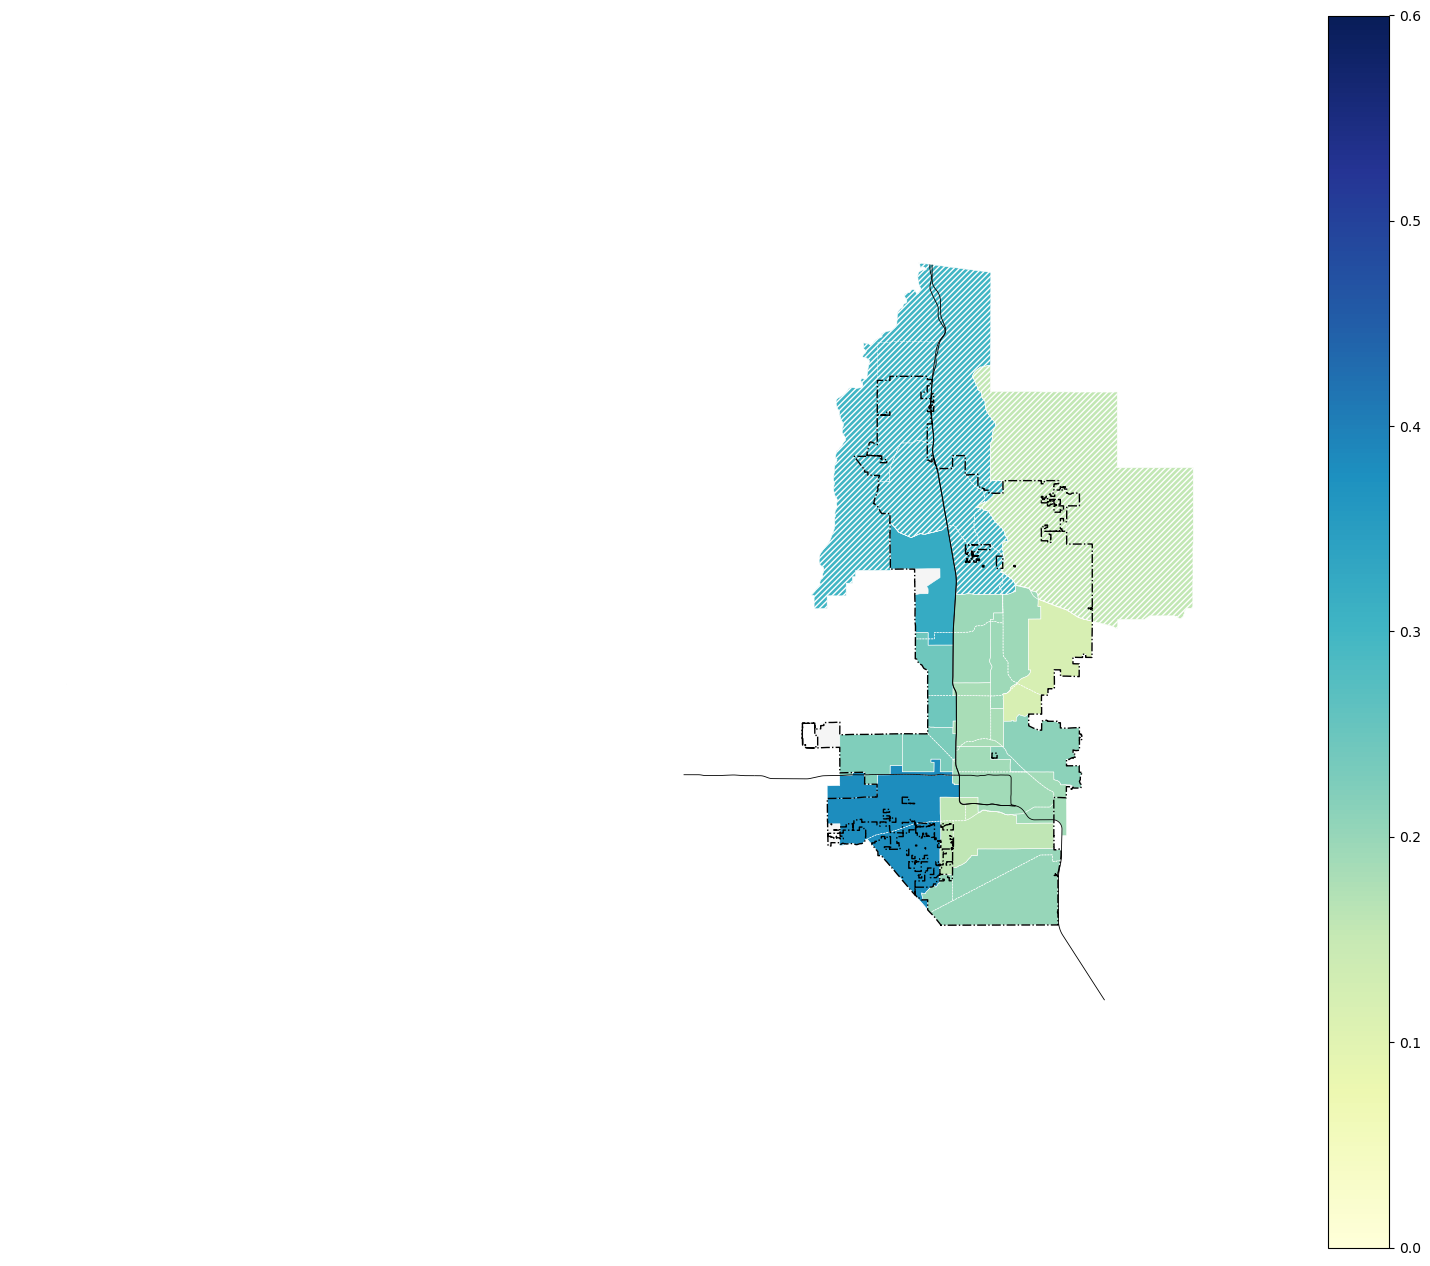

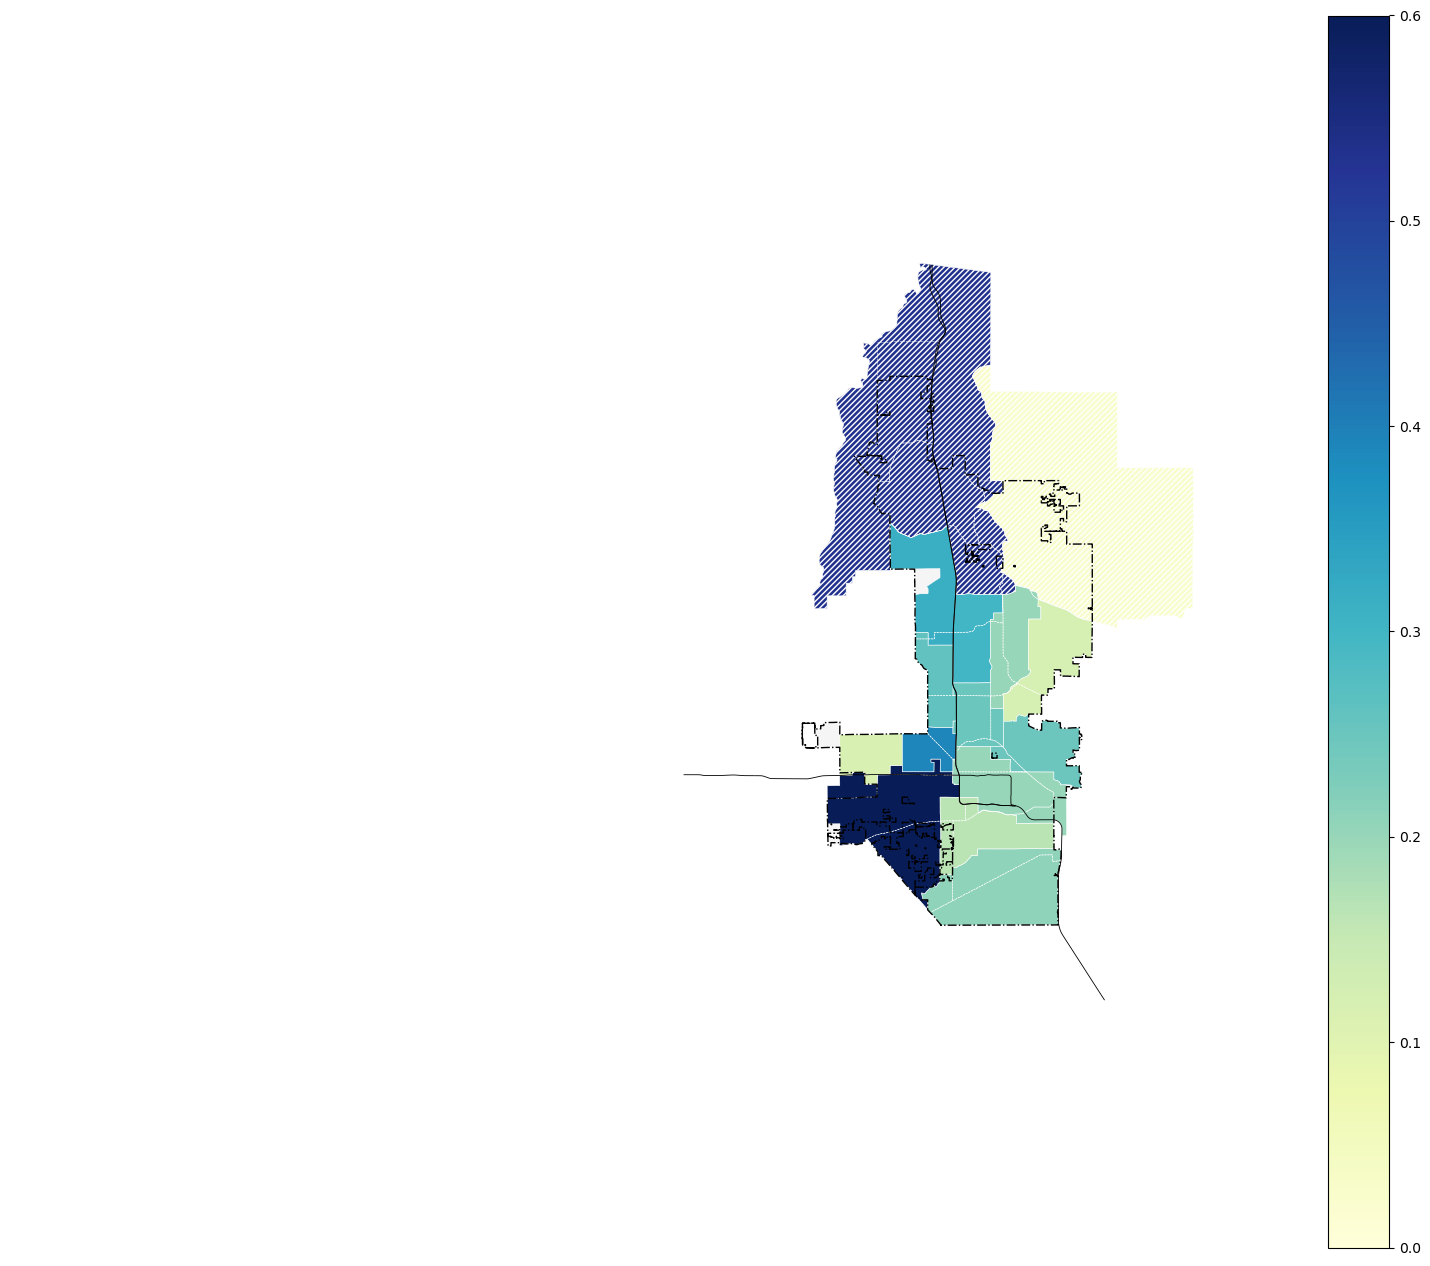

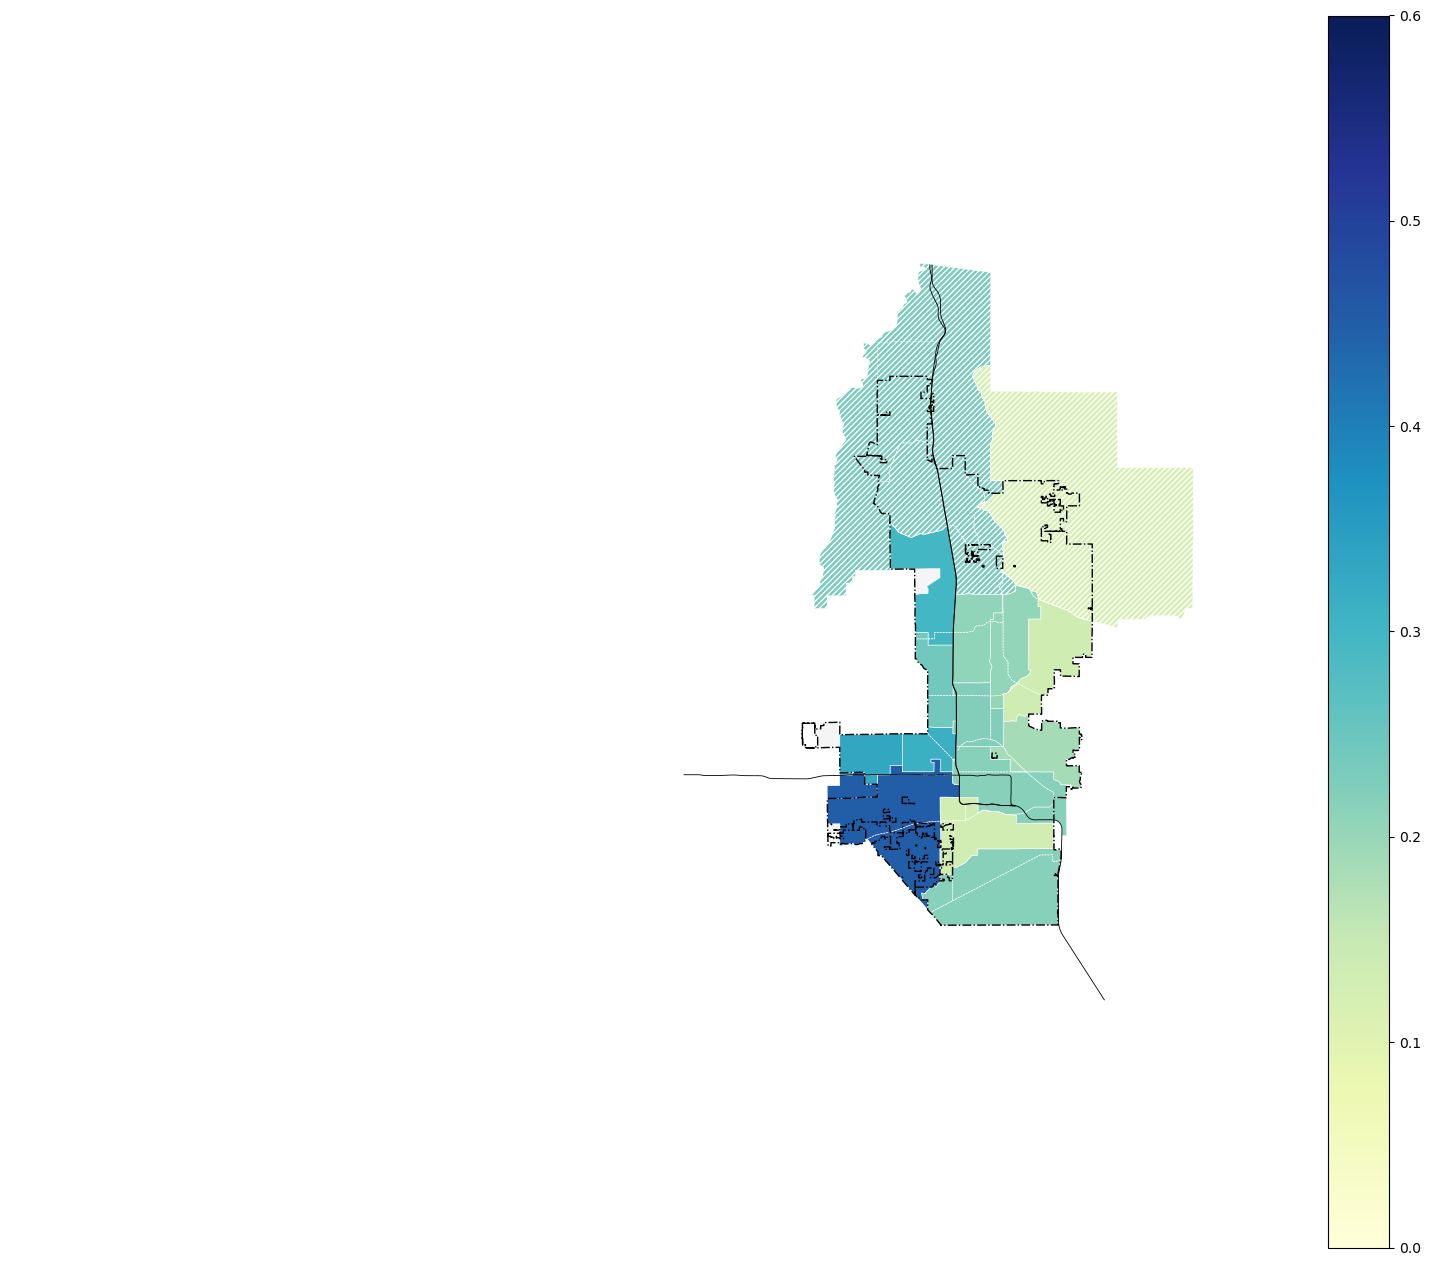

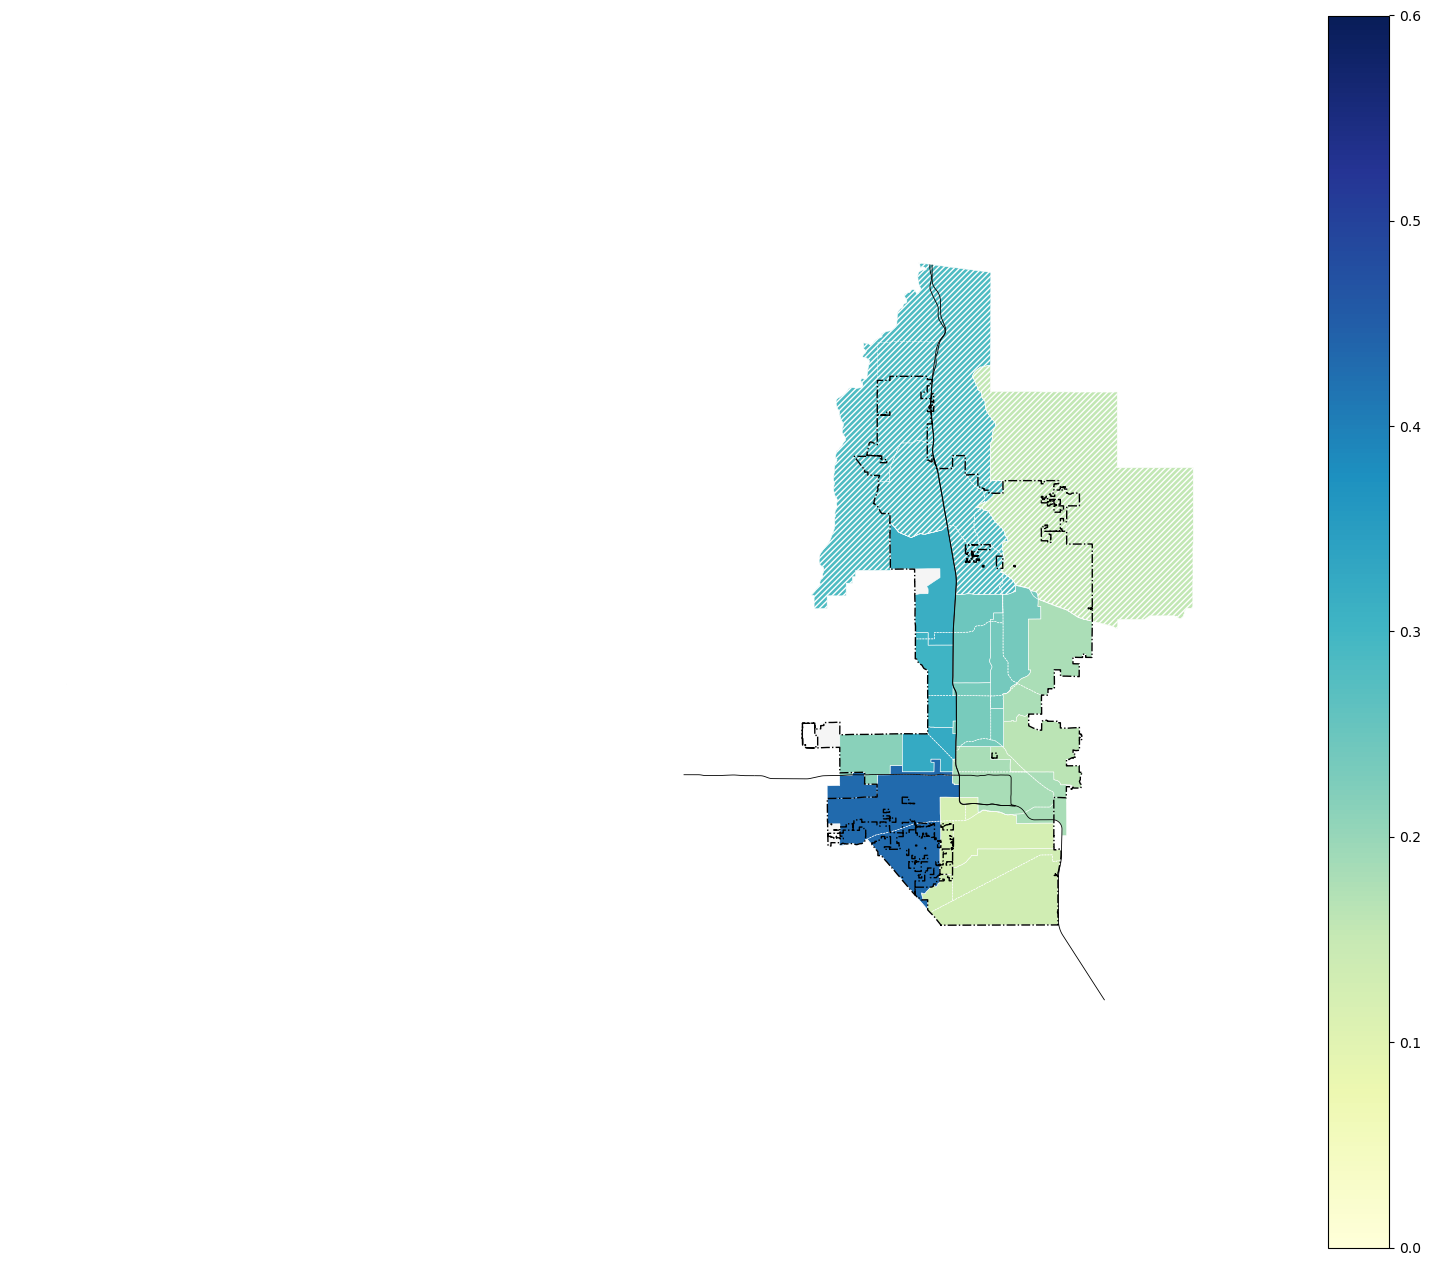

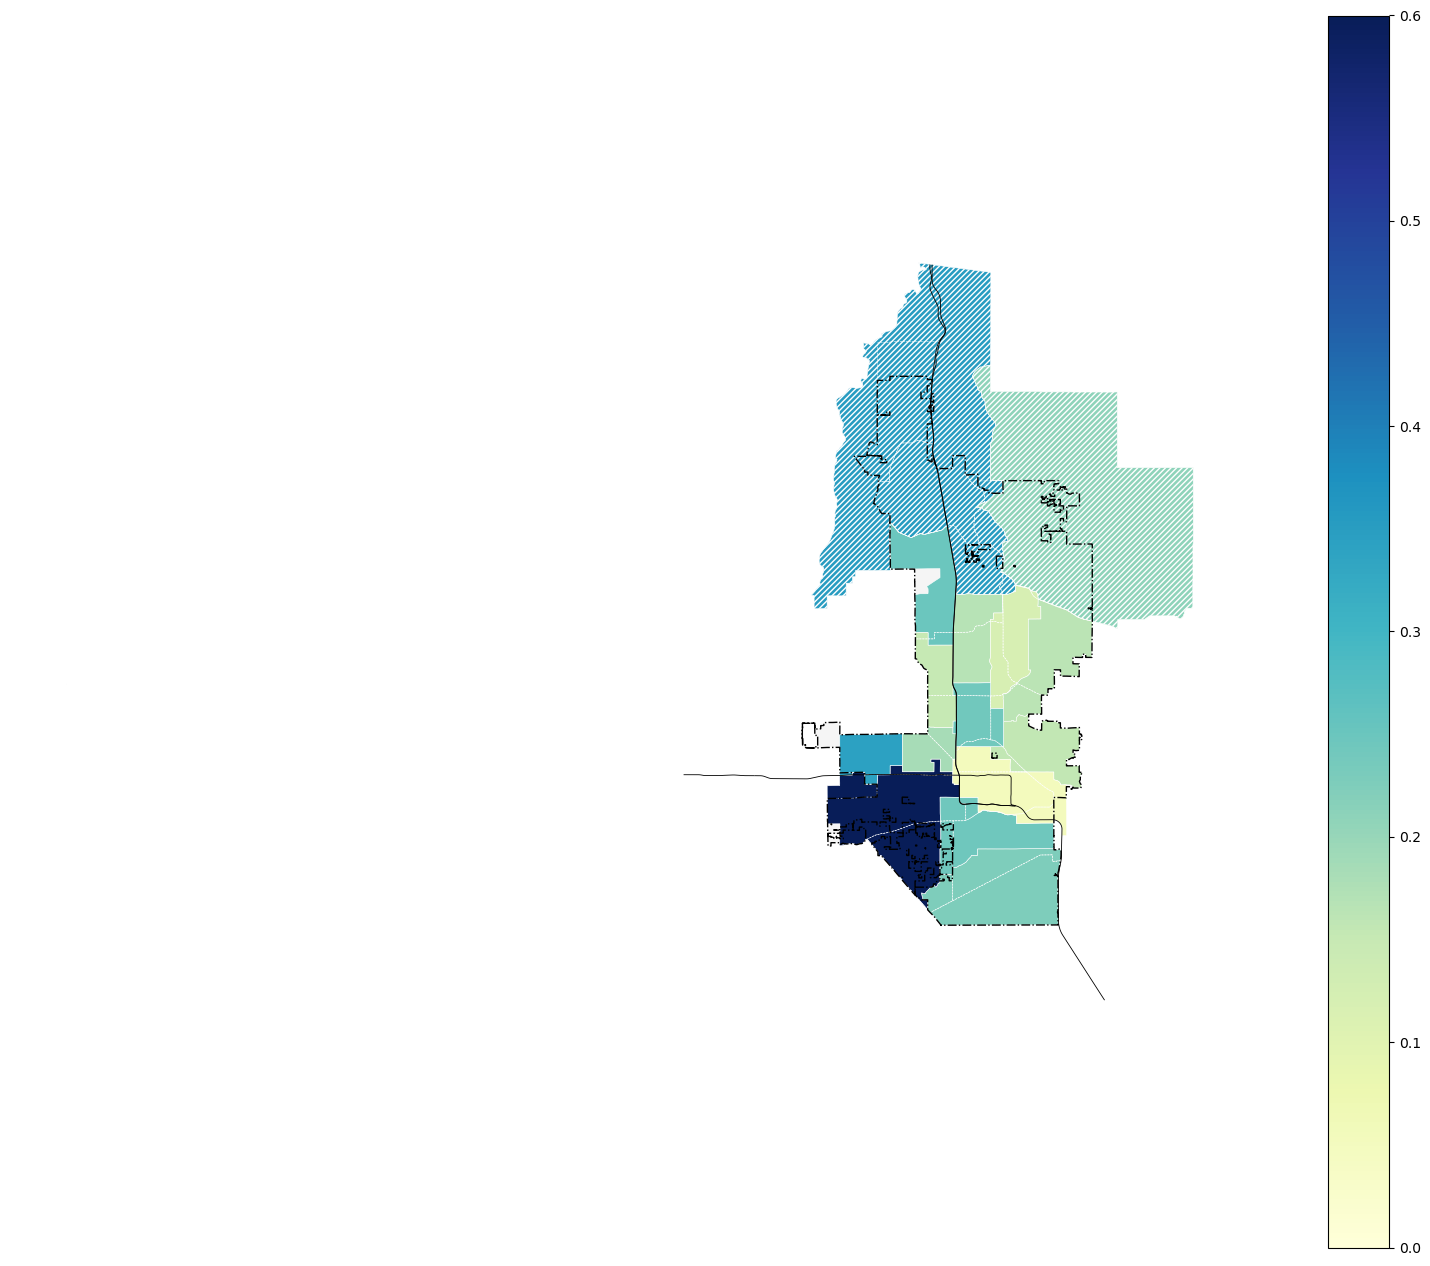

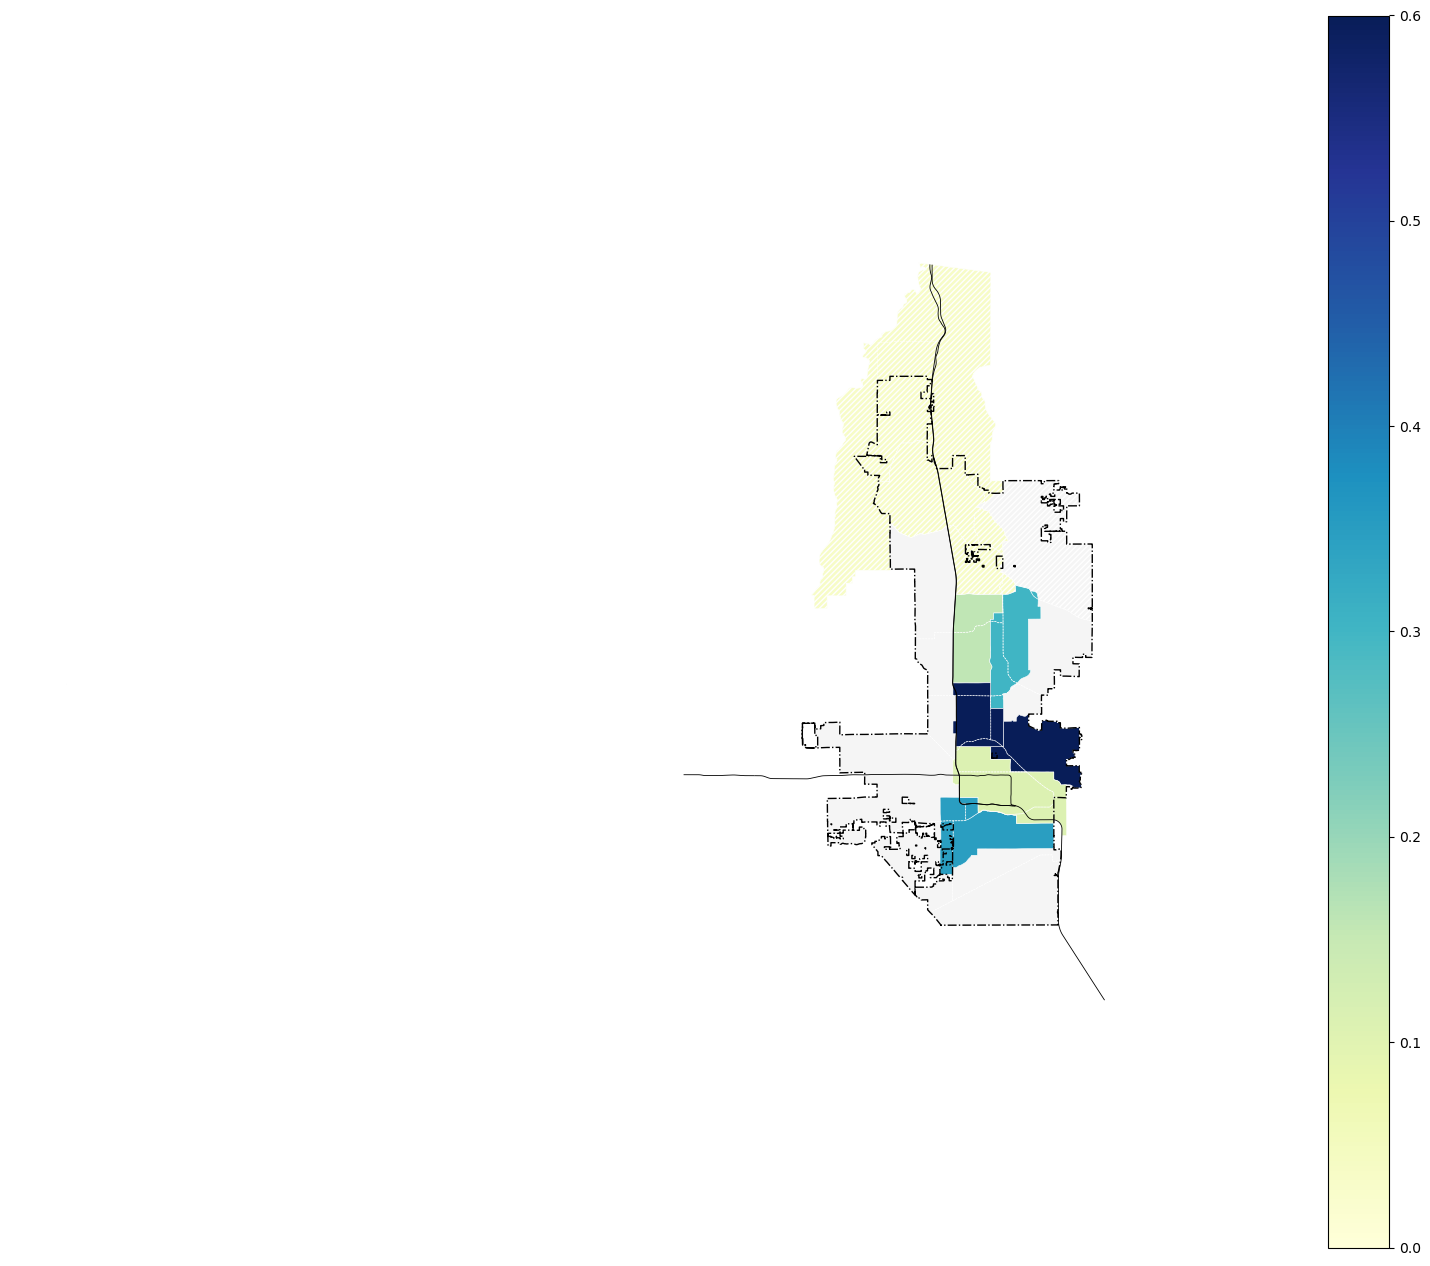

In [10]:
for size in ['overall','studio','one','two','three','four']: 
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=.0,vmax=.6)
    sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
    sm.set_array([])
    phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
    df.plot(column = f'{size}_1922p', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
    mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
    villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
    phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
    road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
    fig.colorbar(sm)
    plt.savefig(f'img/rent_mf_60pct_{size[:2]}.jpg', dpi = 300) # saving each